# Tarea 1 (2024)
Profesor: Tomás de Camino Beck, Ph.D.


---

### Instrucciones Generales

- **Entrega**: *3 de Septiembre* antes de media noche. La tarea debe ser enviada por un miembro del equipo
-**Lectura**:  Gran parte de los problemas se basan en el capítulo 4 del libro, apoyado en los capítulos anteriores. Puede que tenga que revisar secciones no vistas en clase.

- **Formato de Entrega:** Los problemas deben ser entregados como un archivo Jupyter Notebook (.ipynb) de Google Colab que incluya todas las soluciones, explicaciones, ejemplos y pruebas solicitadas. Enviar al email del profesor.
- **Estructura del Informe:**
  - **Equipo:** Indicar nombre completo e identificación de cada miebro
  - **Introducción:** Breve introducción a cada problema, explicando el enfoque general.
  - **Código:** Cada problema debe incluir el código bien comentado.
  - **Ejemplos:** Deben incluirse ejemplos de uso del código con entradas específicas y resultados esperados.
  - **Pruebas:** Incluir casos de prueba que demuestren la funcionalidad del código, con explicaciones de los resultados.
  - **Conclusión:** Breve conclusión sobre cada problema, discutiendo cualquier desafío encontrado y cómo fue resuelto.

# Base Source Code and utilities

## Imports

In [129]:
import ipytest
ipytest.autoconfig()

## DFA

En caso de que necesitemos una clase DFA

In [130]:
class DFA:
    def __init__(self, Q, Sigma, delta, q0, F):
        self.Q = Q          # Conjunto de estados
        self.Sigma = Sigma  # Alfabeto
        self.delta = delta  # Función de transición
        self.q0 = q0        # Estado inicial
        self.F = F          # Conjunto de estados finales

    def head(self, w):
        """Devuelve el primer símbolo de la palabra w."""
        return w[0] if w else None

    def tail(self, w):
        """Devuelve la palabra w sin su primer símbolo."""
        return w[1:] if w else ""

    def MemDFA(self, w, q):
        if w == "":
            return q in self.F
        else:
            a = self.head(w)        # Usando head(w)
            w_tail = self.tail(w)   # Usando tail(w)
            q_next = self.delta[q][a]
            return self.MemDFA(w_tail, q_next)

    def CompDFA(self):
        # Paso 1: Inicializar Q', δ', q0' y F'
        Q_prime = self.Q
        delta_prime = self.delta
        q0_prime = self.q0
        F_prime = set()  # Inicialmente vacío

        # Paso 2: Completar F'
        for q in self.Q:
            if q not in self.F:
                F_prime.add(q)

        # Retornar el nuevo DFA complementado
        return DFA(Q_prime, self.Sigma, delta_prime, q0_prime, F_prime)

## NFA

Considerando una clase simple NFA, la cual es capaz de imprimir los estados y las transacciones de una manera comprensiva.

In [131]:
class NFA:
    def __init__(self, states, alphabet, transitions, start_state, final_states, name='') -> None:
        """
        Constructor de NFA
        Args:
            states (list<str>): Lista de todos los estados
            alphabet (list<str>): Lista de las letras del alfabeto
            transitions (dict): Funcion de transicion
            start_state (str): Estado inicial
            final_states (list<str>): Lista de los estados finales
        Returns:
            None
        """
        self.states = states
        self.alphabet = alphabet
        self.transitions = transitions
        self.start_state = start_state
        self.final_states = final_states
        self.name = name
        self.__rename_epsilon_transition__()

    def __rename_epsilon_transition__(self) -> None:
        for key in self.transitions.keys():
            if '' in self.transitions[key].keys():
                self.transitions[key]['ε'] = self.transitions[key]['']
                del self.transitions[key]['']


    def __str__(self):
        """
        Imprime los estados y transiciones de los estados
        """
        transitions_str = '\n'.join(
            [f"{state} --{symbol}--> {', '.join(next_states)}"
             for state, paths in self.transitions.items()
             for symbol, next_states in paths.items()]
        )
        return (
            f"\n=====================================\n"
            f"NFA: {self.name}\n"
            f"States: {self.states}\n"
            f"Alphabet: {self.alphabet}\n"
            f"Transitions:\n{transitions_str}\n"
            f"Start State: {self.start_state}\n"
            f"Final States: {self.final_states}\n"
            f"=====================================\n"
        )

## Solution

---

#### **Problema 1: Construcción e Implementación de `RegtoNFA` con Expresiones Regulares Avanzadas**
- **Descripción:**
  - Implementa en Python el algoritmo `RegtoNFA` que convierte una expresión regular avanzada, que incluye operadores como repetición variable $\{m,n\}$, en un NFA (Autómata Finito No Determinista). Este NFA debe ser capaz de reconocer si algún prefijo de un texto dado pertenece al lenguaje $L(\Sigma^*p)$.

In [132]:
class RegToNFA:
    def __init__(self):
        self.state_count = 0

    def _new_state(self):
        self.state_count += 1
        return f"S{self.state_count}"

    def regex_to_nfa(self, regex, name=''):
        self.name = name
        return self._regex_to_nfa_helper(regex)

    def _regex_to_nfa_helper(self, regex):
        if regex == '':
            return self._empty_nfa()
        elif len(regex) == 1:
            return self._single_char_nfa(regex)
        elif '|' in regex:
            return self._union_nfa(regex)
        elif '*' in regex:
            return self._kleene_star_nfa(regex)
        else:
            return self._concat_nfa(regex)

    def _empty_nfa(self):
        start_state = self._new_state()
        final_state = self._new_state()
        return NFA(
            states={start_state, final_state},
            alphabet=set(),
            transitions={},
            start_state=start_state,
            final_states={final_state},
            name=self.name
        )

    def _single_char_nfa(self, char):
        start_state = self._new_state()
        final_state = self._new_state()
        transitions = {start_state: {char: {final_state}}}
        return NFA(
            states={start_state, final_state},
            alphabet={char},
            transitions=transitions,
            start_state=start_state,
            final_states={final_state},
            name=self.name
        )

    def _concat_nfa(self, regex):
        first_nfa = self._regex_to_nfa_helper(regex[0])
        rest_nfa = self._regex_to_nfa_helper(regex[1:])

        first_nfa.transitions[first_nfa.final_states.pop()] = {
            '': {rest_nfa.start_state}
        }
        first_nfa.states.update(rest_nfa.states)
        first_nfa.transitions.update(rest_nfa.transitions)
        first_nfa.final_states = rest_nfa.final_states

        return first_nfa

    def _union_nfa(self, regex):
        parts = regex.split('|')
        nfa1 = self._regex_to_nfa_helper(parts[0])
        nfa2 = self._regex_to_nfa_helper(parts[1])

        start_state = self._new_state()
        final_state = self._new_state()

        transitions = {
            start_state: {'': {nfa1.start_state, nfa2.start_state}},
            **nfa1.transitions,
            **nfa2.transitions,
            nfa1.final_states.pop(): {'': {final_state}},
            nfa2.final_states.pop(): {'': {final_state}},
        }

        states = {start_state, final_state, *nfa1.states, *nfa2.states}
        alphabet = nfa1.alphabet.union(nfa2.alphabet)

        return NFA(
            states=states,
            alphabet=alphabet,
            transitions=transitions,
            start_state=start_state,
            final_states={final_state},
            name=self.name
        )

    def _kleene_star_nfa(self, regex):
        inner_regex = regex.replace('*', '')
        inner_nfa = self._regex_to_nfa_helper(inner_regex)

        start_state = self._new_state()
        final_state = self._new_state()

        transitions = {
            start_state: {'': {inner_nfa.start_state, final_state}},
            inner_nfa.final_states.pop(): {'': {inner_nfa.start_state, final_state}},
            **inner_nfa.transitions
        }

        states = {start_state, final_state, *inner_nfa.states}
        alphabet = inner_nfa.alphabet

        return NFA(
            states=states,
            alphabet=alphabet,
            transitions=transitions,
            start_state=start_state,
            final_states={final_state},
            name=self.name
        )

##### Casos de usos:

In [133]:
converter = RegToNFA()

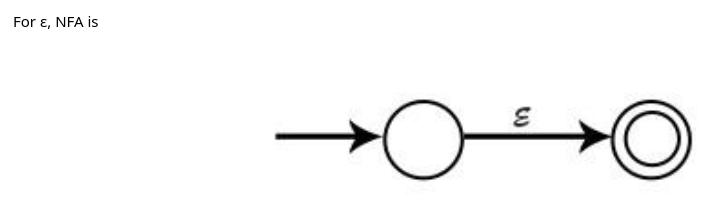

In [134]:
nfa = converter.regex_to_nfa('', 'Vacio')
print(nfa)


NFA: Vacio
States: {'S1', 'S2'}
Alphabet: set()
Transitions:

Start State: S1
Final States: {'S2'}



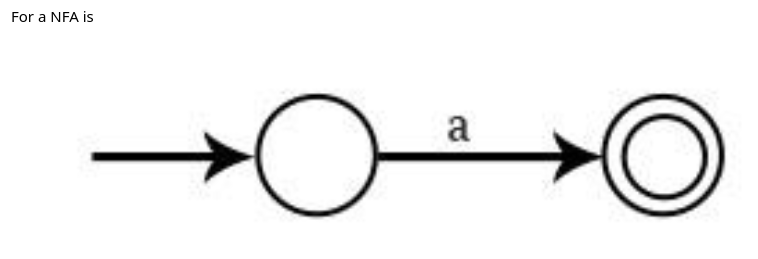

In [135]:
nfa = converter.regex_to_nfa('a', '1 letras')
print(nfa)


NFA: 1 letras
States: {'S4', 'S3'}
Alphabet: {'a'}
Transitions:
S3 --a--> S4
Start State: S3
Final States: {'S4'}



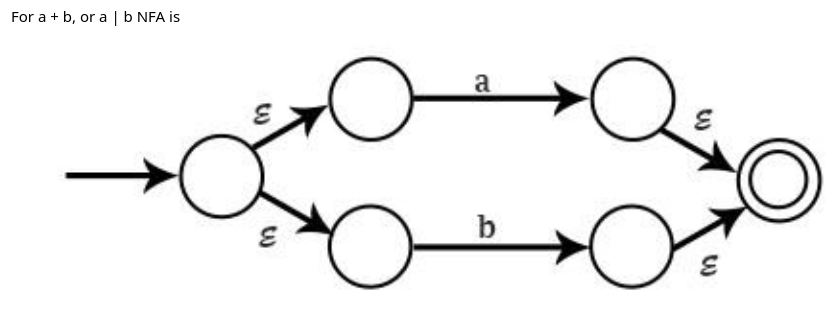

In [136]:
nfa = converter.regex_to_nfa('a|b', 'Condicion or')
print(nfa)


NFA: Condicion or
States: {'S6', 'S10', 'S9', 'S7', 'S5', 'S8'}
Alphabet: {'b', 'a'}
Transitions:
S9 --ε--> S5, S7
S5 --a--> S6
S7 --b--> S8
S6 --ε--> S10
S8 --ε--> S10
Start State: S9
Final States: {'S10'}



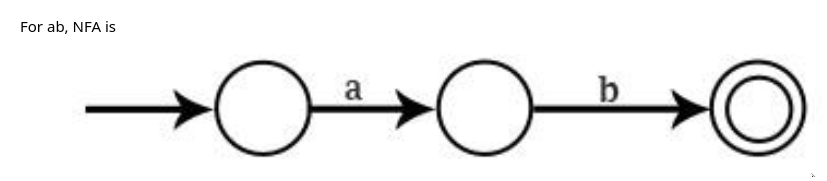

In [137]:
nfa = converter.regex_to_nfa('ab', '2 letras')
print(nfa)


NFA: 2 letras
States: {'S13', 'S12', 'S14', 'S11'}
Alphabet: {'a'}
Transitions:
S11 --a--> S12
S12 ----> S13
S13 --b--> S14
Start State: S11
Final States: {'S14'}



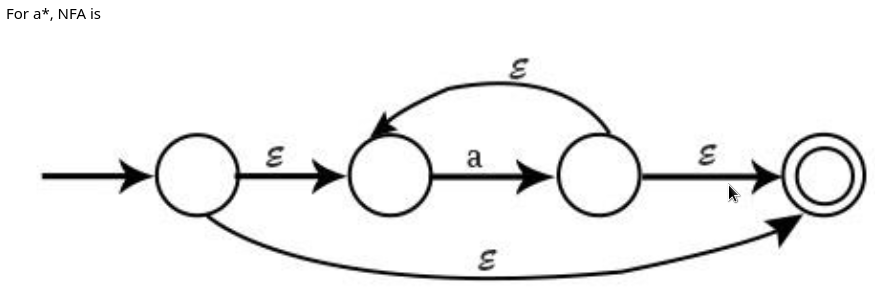

In [138]:
nfa = converter.regex_to_nfa('a*', 'Al menos 1 a')
print(nfa)


NFA: Al menos 1 a
States: {'S16', 'S17', 'S18', 'S15'}
Alphabet: {'a'}
Transitions:
S17 --ε--> S18, S15
S16 --ε--> S18, S15
S15 --a--> S16
Start State: S17
Final States: {'S18'}



##### Pruebas unitarias:

In [139]:
def test_emptyRegex():
    converter = RegToNFA()
    nfa = converter.regex_to_nfa('', 'Vacio')
    assert 2 == len(nfa.states)
    assert not nfa.transitions

ipytest.run('-vv')

======================================= test session starts ========================================
platform linux -- Python 3.10.14, pytest-8.3.2, pluggy-1.5.0 -- /home/brjmm/miniconda3/bin/python
cachedir: .pytest_cache
rootdir: /mnt/repos/AutomataTheory
plugins: anyio-4.2.0
collecting ... collected 1 item

t_3a8518d527e04935b73fcf3aa2dfd836.py::test_emptyRegex PASSED                                [100%]

======================================== 1 passed in 0.01s =========================================


<ExitCode.OK: 0>

In [140]:
# Hay que tomar los ejemplos de aca para hacer el unit test: https://www.tutorialspoint.com/what-is-the-conversion-of-a-regular-expression-to-finite-automata-nfa



- **Parte 2:** **Desafío Adicional:** Extiende el NFA para manejar operaciones de intersección y unión en la expresión regular. Justifica cada paso de la construcción y proporciona ejemplos complejos que no solo contengan concatenación y cierre de Kleene, sino también intersección y unión.


#### **Problema 2: Optimización de NFA mediante Eliminación de Transiciones $\varepsilon$ y Minimización**
- **Descripción:**
  - Utiliza el NFA construido en el Problema 1, elimina las transiciones $\varepsilon$ y luego aplica técnicas de minimización para reducir el número de estados manteniendo la equivalencia del autómata.

- **Parte 2:** **Desafío Adicional:** Implementa un algoritmo de minimización de NFA basado en particiones de estados equivalentes. Realiza un análisis de eficiencia comparando el NFA original, el NFA sin transiciones $\varepsilon$, y el NFA minimizado, en términos de cantidad de estados y transiciones.

#### **Problema 3: Simulación de `PatternMatchingNFA` con Optimización de Búsqueda**
- **Descripción:**
  - Implementa un simulador en Python que utilice el NFA minimizado del Problema 2 para realizar una coincidencia de patrones eficiente en un texto dado. El simulador debe optimizar la búsqueda mediante heurísticas que reduzcan el número de transiciones exploradas.

- **Parte 2:** **Desafío Adicional:** Implementa una estrategia de búsqueda paralela para acelerar el proceso de coincidencia en textos grandes, utilizando múltiples hilos o procesos. Analiza el rendimiento de tu implementación en términos de tiempo de ejecución y uso de recursos.


#### **Problema 4: Conversión de NFA a DFA y Manejo de la Explosión Exponencial de Estados**
- **Descripción:**
  - Convierte el NFA minimizado del Problema 2 en un DFA usando `NFAtoDFA`. Dado que la conversión de NFA a DFA puede resultar en una explosión exponencial de estados, implementa técnicas para manejar y mitigar este problema.


- **Parte 2:** **Desafío Adicional:** Diseña e implementa un algoritmo de conversión incremental que solo construya partes del DFA según sea necesario durante la coincidencia de patrones. Esto incluye el concepto de "DFA bajo demanda". Evalúa cómo esta técnica afecta el rendimiento en comparación con un DFA preconstruido completo.

#### **Problema 5: Simulación de `PatternMatchingDFA` con Memorización y Predicción**
- **Descripción:**
  - Implementa un simulador para el DFA obtenido en el Problema 4. Para mejorar la eficiencia, incorpora técnicas de memorización (almacenamiento en caché de resultados de subproblemas) y predicción de transiciones, anticipando las siguientes letras en el texto.


- **Parte 2:** **Desafío Adicional:** Extiende el simulador para manejar textos de gran tamaño, donde se requieren estrategias de almacenamiento y recuperación de datos eficientes. Esto podría incluir la implementación de estructuras de datos avanzadas como árboles de sufijos o tries para gestionar la búsqueda de patrones en grandes volúmenes de texto.



#### **Problema 6: Comparación Empírica y Teórica de `PatternMatchingNFA` vs. `PatternMatchingDFA` en Escenarios Complejos**
- **Descripción:**
  - Realiza un estudio comparativo entre los algoritmos `PatternMatchingNFA` y `PatternMatchingDFA` en términos de eficiencia, uso de memoria y aplicabilidad en escenarios reales con textos y patrones de alta complejidad.



- **Parte 2:** **Desafío Adicional:** Implementa un modelo híbrido que combine las ventajas del NFA y DFA, utilizando el NFA en etapas tempranas para filtrar posibles coincidencias y el DFA para validar las coincidencias finales. Evalúa este enfoque en comparación con el uso exclusivo de NFA o DFA en términos de precisión y rendimiento.